<a href="https://colab.research.google.com/github/Yun5141/comp0036/blob/master/FootballResultPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

# 2. Data Import

In [0]:
import pandas as pd 

# import training data set
url="https://raw.githubusercontent.com/Yun5141/comp0036/master/epl-training.csv"
raw_training_data=pd.read_csv(url)

# import test set
url = 'https://raw.githubusercontent.com/Yun5141/comp0036/master/epl-test.csv'
rawData_toPred = pd.read_csv(url)

# import 2019 up-to-date data (from http://www.football-data.co.uk)
url = 'https://raw.githubusercontent.com/Yun5141/comp0036/master/2019EPL.csv'
rawData_2019_uptodate = pd.read_csv(url)

# import geometric information of teams
url = "https://raw.githubusercontent.com/Yun5141/comp0036/master/stadiums-with-GPS-coordinates.csv"
geometricData = pd.read_csv(url)

# 3. Data Transformation & Exploration

# 4. Methodology Overview

# 5. Model Training & Validation

# 6. Result

# 7. Final Predictions on Test Set

# -----------------------------------------


In [0]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from os import chdir
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# you may need to import sklearn.lda.LDA and sklearn.qda.QDA instead
# depending on which version you have installed
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve

from google.colab import files
import io
from geopy.distance import geodesic 
from geopy.distance import great_circle 

import datetime
!pip install lime
!pip install python-dateutil
import lime
import dateutil



     |████████████████████████████████| 276kB 11.2MB/s 
  Created wheel for lime: filename=lime-0.1.1.37-cp36-none-any.whl size=284277 sha256=c4b48353243dc0a72db5935618ef4fd89b787a57c4a62ab6a6dc5718728d5fcb
  Stored in directory: /root/.cache/pip/wheels/c1/38/e7/50d75d4fb75afa604570dc42f20c5c5f5ab26d3fbe8d6ef27b
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12073 sha256=c0538e813e4f0030945719878585e2639bd59417a4998932566e0fa9ec8c3519
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built lime progressbar


In [0]:
'''
# upload file

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
'''

'\n# upload file\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))\n'

In [0]:
# upload file / import data [done]

url="https://raw.githubusercontent.com/Yun5141/comp0036/master/elp_up-to-date_data.csv"
training_data=pd.read_csv(url)
training_data

url = "https://raw.githubusercontent.com/Yun5141/comp0036/master/stadiums-with-GPS-coordinates.csv"
geometricData = pd.read_csv(url)
geometricData

url = "https://raw.githubusercontent.com/Yun5141/comp0036/master/epl-test.csv"
test_data=pd.read_csv(url)
test_data

,Date,HomeTeam,AwayTeam
0,11 Jan 20,Bournemouth,Watford
1,11 Jan 20,Aston Villa,Man City
2,11 Jan 20,Chelsea,Burnley
3,11 Jan 20,Crystal Palace,Arsenal
4,11 Jan 20,Everton,Brighton
5,11 Jan 20,Leicester,Southampton
6,11 Jan 20,Man United,Norwich
7,11 Jan 20,Sheffield United,West Ham
8,11 Jan 20,Tottenham,Liverpool
9,11 Jan 20,Wolves,Newcastle


In [0]:
# cleaning data
def dataCleaning(raw_data):
  # 1. 把十年赛季分开？
  # 2. 去掉不要的 / pick需要的
  pass

In [0]:
# get match week
def get_MW(data):
  pass 

In [0]:
#classify the date of each match
def dateclassifier(date1, date2):
  date1=dateutil.parser.parse(date1)
  date2=dateutil.parser.parse(date2)
  delta=dateutil.relativedelta.relativedelta(date1,date2)
  if delta.days<0 or delta.months>0:
    return 0
  elif delta.days==0:
    return -1
  elif delta.days>=7:
    return 1
  elif delta.days<7:
    return 2

In [0]:
'''
  date_format = "%d/%m/%Y"
  d1 = datetime.datetime.strptime("16/08/2008", date_format).date()
  d2 = datetime.datetime.strptime("12/05/2019", date_format).date()
  d = d1
  step = datetime.timedelta(days=7)

  while d < d2:
      print(d.strftime(date_format))
      d += step
'''

'\n  date_format = "%d/%m/%Y"\n  d1 = datetime.datetime.strptime("16/08/2008", date_format).date()\n  d2 = datetime.datetime.strptime("12/05/2019", date_format).date()\n  d = d1\n  step = datetime.timedelta(days=7)\n\n  while d < d2:\n      print(d.strftime(date_format))\n      d += step\n'

In [0]:
#get the distance needed to travel for the away team [done]
def getDistance(data, geometricData):
  array = []
  for x in data.iterrows():
   
    home_lat = (geometricData.loc[geometricData['Team'] == x[1].HomeTeam]).Latitude
    home_long = (geometricData.loc[geometricData['Team'] == x[1].HomeTeam]).Longitude
    home_location = (np.float32(home_lat), np.float32(home_long))
    
    away_lat = (geometricData.loc[geometricData['Team'] == x[1].AwayTeam]).Latitude
   
    away_long = (geometricData.loc[geometricData['Team'] == x[1].AwayTeam]).Longitude
    away_location = (np.float32(away_lat), np.float32(away_long))
    array.append(np.float32(geodesic(home_location, away_location).km))
  
  
  DIS = pd.Series(array)
  data.loc[:,'DIS'] = DIS
getDistance(test_data, geometricData) 
getDistance(training_data, geometricData)
test_data


,Date,HomeTeam,AwayTeam,DIS
0,11 Jan 20,Bournemouth,Watford,147.403778
1,11 Jan 20,Aston Villa,Man City,110.424690
2,11 Jan 20,Chelsea,Burnley,291.506989
3,11 Jan 20,Crystal Palace,Arsenal,17.503672
4,11 Jan 20,Everton,Brighton,348.031067
5,11 Jan 20,Leicester,Southampton,191.525848
6,11 Jan 20,Man United,Norwich,258.923889
7,11 Jan 20,Sheffield United,West Ham,230.038284
8,11 Jan 20,Tottenham,Liverpool,282.755493
9,11 Jan 20,Wolves,Newcastle,267.589935


In [0]:
"""
# calculating distance

# training_data = pd.read_csv('/content/epl-training.csv')
# geometricData = pd.read_csv('/content/stadiums-with-GPS-coordinates.csv')
Teams = training_data.HomeTeam
geometricData = geometricData.loc[geometricData['Team'].isin(Teams)]
print(geometricData)
array = []
for x in training_data.iterrows():
  home_lat = (geometricData.loc[geometricData['Team'] == x[1].HomeTeam]).Latitude
  home_long = (geometricData.loc[geometricData['Team'] == x[1].HomeTeam]).Longitude
  home_location = (np.float32(home_lat), np.float32(home_long))
  away_lat = (geometricData.loc[geometricData['Team'] == x[1].AwayTeam]).Latitude
  away_long = (geometricData.loc[geometricData['Team'] == x[1].AwayTeam]).Longitude
  away_location = (np.float32(away_lat), np.float32(away_long))
  array.append(great_circle(home_location, away_location).km)
DIS = pd.Series(array)
training_data.insert(22, 'DIS', DIS)
training_data.to_csv(r'/content/training_data_with_distance.csv', index=False) 
"""

"\n# calculating distance\n\n# training_data = pd.read_csv('/content/epl-training.csv')\n# geometricData = pd.read_csv('/content/stadiums-with-GPS-coordinates.csv')\nTeams = training_data.HomeTeam\ngeometricData = geometricData.loc[geometricData['Team'].isin(Teams)]\nprint(geometricData)\narray = []\nfor x in training_data.iterrows():\n  home_lat = (geometricData.loc[geometricData['Team'] == x[1].HomeTeam]).Latitude\n  home_long = (geometricData.loc[geometricData['Team'] == x[1].HomeTeam]).Longitude\n  home_location = (np.float32(home_lat), np.float32(home_long))\n  away_lat = (geometricData.loc[geometricData['Team'] == x[1].AwayTeam]).Latitude\n  away_long = (geometricData.loc[geometricData['Team'] == x[1].AwayTeam]).Longitude\n  away_location = (np.float32(away_lat), np.float32(away_long))\n  array.append(great_circle(home_location, away_location).km)\nDIS = pd.Series(array)\ntraining_data.insert(22, 'DIS', DIS)\ntraining_data.to_csv(r'/content/training_data_with_distance.csv', index

In [0]:
#calculate HTdd, it can be regard as "fatigue" of hometeam
def adddatedelta(training_data):
  time=0
  hometeamdatedelta=[]
  for index1,row1 in training_data.iterrows():
    time+=1
    #HomeTeam loop
    delta=0
    '''for index2,row2 in training_data.iterrows():
      if row1['HomeTeam']==row2['HomeTeam'] or row1['HomeTeam']==row2['AwayTeam']:
        x=dateclassifier(row1['Date'],row2['Date'])
        if x>delta and x!=0:
          delta=x'''
    sdata=training_data.loc[training_data['HomeTeam']==row1['HomeTeam']]
    for index2,row2 in sdata.iterrows():
      x = dateclassifier(row1['Date'], row2['Date'])
      if x > delta:
        delta = x
    hometeamdatedelta.append(np.float32(delta))
  HTdd=pd.Series(hometeamdatedelta)
  training_data.loc[:,'HTdd'] = HTdd
adddatedelta(training_data)
training_data

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,DIS,HTdd
0,16/08/08,Arsenal,West Brom,1,0,H,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0,165.772156,2.0
1,16/08/08,Bolton,Stoke,3,1,H,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0,70.146103,0.0
2,16/08/08,Everton,Blackburn,2,3,A,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0,45.151447,0.0
3,16/08/08,Hull,Fulham,2,1,H,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0,252.920654,2.0
4,16/08/08,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0,339.932465,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,14/12/2019,Southampton,West Ham,0,1,A,0,1,A,M Atkinson,11,11,2,4,9,14,5,8,1,3,0,0,121.822838,2.0
4346,15/12/2019,Man United,Everton,1,1,D,0,1,A,M Oliver,24,8,8,3,10,12,6,5,1,2,0,0,44.924431,2.0
4347,15/12/2019,Wolves,Tottenham,1,2,A,0,1,A,S Attwell,18,9,5,5,14,10,11,2,4,4,0,0,179.083374,2.0
4348,15/12/2019,Arsenal,Man City,0,3,A,0,3,A,P Tierney,6,14,1,7,9,24,3,3,1,4,0,0,257.244537,2.0


In [0]:
# average away team win rate

def predictions_0(data):
  
    predictions = 0
    for _, game in data.iterrows():
        
        if game['FTR']=='A':
          # print('hi')
          predictions+=1
        else:
          predictions+=0
    return predictions

avg_acc_sum = 0

prediction = predictions_0(training_data)

print('average away team win rate：%s'%(prediction/len(training_data)))
# just a test, this part can be ignored

average away team win rate：0.2910344827586207


In [0]:
# training_data2 = pd.read_csv('/content/training_data_with_distance.csv')
# a = []
# for i in np.arange(20, 73, 1).tolist():
#   a.append(i)

# training_data = training_data.drop(training_data.columns[a], axis = 1)

#transfer Home, Away and Draw into numbers
training_data = training_data.drop(['Date'],1)
def only_hw(string):
    if string == 'H':
        return 1
    if string == 'A':
        return 0
    else:
        return 2

training_data.FTR = training_data.FTR.apply(only_hw)
training_data.HTR = training_data.HTR.apply(only_hw)

#transfer referee to numbers
referee = dict(zip(list(dict.fromkeys(training_data.Referee)), np.arange(0, len(dict.fromkeys(training_data.Referee)), 1).tolist()))
result = dict(zip(list(dict.fromkeys(training_data.HomeTeam)), np.arange(0, 36, 1).tolist()))

def referee_to_num(string):
    if string in referee:
        return referee[string]
def team_to_num(string):
    if string in result:
        return result[string]
training_data.HomeTeam = training_data.HomeTeam.apply(team_to_num)   
training_data.AwayTeam = training_data.AwayTeam.apply(team_to_num) 
training_data.Referee = training_data.Referee.apply(referee_to_num) 

# remove data which contains NaN, infinite or overflowed number
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(training_data)

#FTHG and FTAG is actually the same as FTR(if you know the final score, you can know which team wins), cannot be put into feature
X_all = training_data.drop(['FTR'],1).drop(['FTHG'],1).drop(['FTAG'],1)
y_all = training_data['FTR'] 


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size = 0.3,random_state = 2,stratify = y_all)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all, y_all,test_size = 0.1,random_state = 2,stratify = y_all)

print(X_train, X_test)


      HomeTeam  AwayTeam  HTHG  HTAG  HTR  ...  AY  HR  AR         DIS  HTdd
3777      31.0       6.0     0     1    0  ...   2   0   0  145.694901   2.0
4020       0.0       8.0     2     0    1  ...   2   0   0    9.968060   2.0
1712      26.0      17.0     1     2    0  ...   1   0   1  254.016083   2.0
4114      33.0      11.0     1     1    2  ...   2   0   0   23.106022   2.0
2862      13.0       9.0     1     2    0  ...   3   0   0  173.928589   2.0
...        ...       ...   ...   ...  ...  ...  ..  ..  ..         ...   ...
2556      15.0      25.0     1     1    2  ...   0   0   0  267.964966   1.0
922       13.0      12.0     1     0    1  ...   1   0   0  192.866776   2.0
935       11.0       6.0     1     2    0  ...   1   0   0   19.205421   2.0
2827      25.0       6.0     0     0    2  ...   1   0   0  275.707031   2.0
112        5.0      19.0     1     0    1  ...   1   0   0  458.784973   0.0

[3033 rows x 20 columns]       HomeTeam  AwayTeam  HTHG  HTAG  HTR  ...  AY

In [0]:


# X_train.to_csv('/content/sample_data/x_train.csv')

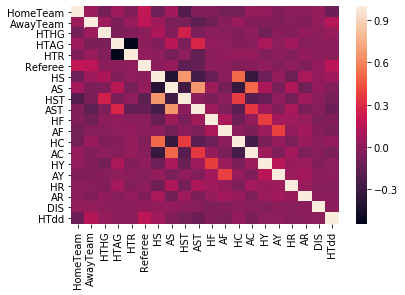

In [0]:
corr = X_all.corr()

from seaborn import heatmap
heatmap(corr)

plt.show()

In [0]:
from sklearn.neural_network import MLPClassifier

gaussian =GaussianNB()
gaussian.fit(X_train, y_train)
y_gaussian = gaussian.predict(X_test)
accuracy = accuracy_score(y_test, y_gaussian)
print(accuracy)

lr = LogisticRegression(solver='lbfgs', multi_class = 'multinomial')
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_lr)
print(accuracy)

lda =LDA()
lda.fit(X_train, y_train)
y_lda = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_lda)
print(accuracy)

qda =QDA()
qda.fit(X_train, y_train)
y_qda = qda.predict(X_test)
accuracy = accuracy_score(y_test, y_qda)
print(accuracy)

dtc =DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_dtc = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_dtc)
print(accuracy)


nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)
nn.fit(X_train, y_train)
y_nn = nn.predict(X_test)
accuracy = accuracy_score(y_test, y_nn)
print(accuracy)


0.6323076923076923
0.6230769230769231
0.6415384615384615
0.6323076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5707692307692308
0.6038461538461538


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import joblib

# set hyper parameter to be changed
parameters = { 
              'C' :[1.0, 100.0, 1000.0],
              'max_iter':[100,200,300, 400, 500],
              'intercept_scaling':[0.1, 0.5, 1.0]
             }
# Logistic Regression
clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
f1_scorer = make_scorer(f1_score, average = 'weighted')
# use grid search to optimise hyper parameter
grid_obj = GridSearchCV(clf,
                    
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=10,
                        )
grid_obj = grid_obj.fit(X_train,y_train)
# get best model
clf = grid_obj.best_estimator_
print(clf)


joblib.dump(clf, 'logistic_regression.model')
lr_2 = joblib.load('logistic_regression.model')


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=0.1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
# GaussianNB
parameters = { 
              'var_smoothing': [1e-09, 1e-07, 1e-05, 1e-11, 1e-13]
             }
clf = GaussianNB()
f1_scorer = make_scorer(f1_score, average = 'weighted')
# use grid search to optimise hyper parameter
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=10,
                        )
grid_obj = grid_obj.fit(X_train,y_train)
# get best model
clf = grid_obj.best_estimator_
print(clf)
joblib.dump(clf, 'GaussianNB.model')
gaussian_2 = joblib.load('GaussianNB.model')


GaussianNB(priors=None, var_smoothing=1e-07)


In [0]:
#LDA
parameters = { 
              'solver': ['svd', 'lsqr', 'eigen'],
              'tol': [ 0.001, 0.0001, 0.00001]
             }
clf = LDA()
f1_scorer = make_scorer(f1_score, average = 'weighted')
# use grid search to optimise hyper parameter
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=10,
                        )
grid_obj = grid_obj.fit(X_train,y_train)
# get best model
clf = grid_obj.best_estimator_
print(clf)
joblib.dump(clf, 'LDA.model')
lda_2 = joblib.load('LDA.model')


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.001)


In [0]:
#QDA()
parameters = { 
              'reg_param': [0, 0.1, 0.01, 0.001],
              'tol': [0.001, 0.0001, 0.00001]
             }
clf = QDA()
f1_scorer = make_scorer(f1_score, average = 'weighted')
# use grid search to optimise hyper parameter
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=10,
                        )
grid_obj = grid_obj.fit(X_train,y_train)
# get best model
clf = grid_obj.best_estimator_
print(clf)
joblib.dump(clf, 'QDA.model')
qda_2 = joblib.load('QDA.model')

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.1,
                              store_covariance=False, tol=0.001)


In [0]:
#Decision Tree
parameters = { 
                'min_impurity_decrease':[0, 0.1, 1],
                 ''
             }
clf = DecisionTreeClassifier()
f1_scorer = make_scorer(f1_score, average = 'weighted')
# use grid search to optimise hyper parameter
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=10,
                        )
grid_obj = grid_obj.fit(X_train,y_train)
# get best model
clf = grid_obj.best_estimator_
print(clf)
joblib.dump(clf, 'DTC.model')
dtc_2 = joblib.load('DTC.model')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

In [0]:
class customMLPClassifer(MLPClassifier):
    def resample_with_replacement(self, X_train, y_train, sample_weight):

        # normalize sample_weights if not already
        sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

        X_train_resampled = np.zeros((len(X_train), len(X_train[0])), dtype=np.float32)
        y_train_resampled = np.zeros((len(y_train)), dtype=np.int)
        for i in range(len(X_train)):
            # draw a number from 0 to len(X_train)-1
            draw = np.random.choice(np.arange(len(X_train)), p=sample_weight)

            # place the X and y at the drawn number into the resampled X and y
            X_train_resampled[i] = X_train[draw]
            y_train_resampled[i] = y_train[draw]

        return X_train_resampled, y_train_resampled

    def _fit(self, X, y, sample_weight=None):
        if sample_weight is not None:
            X, y = self.resample_with_replacement(X, y, sample_weight)

        return self._fit(X, y, incremental=(self.warm_start and
                                            hasattr(self, "classes_")))

In [0]:
#Neural Network
parameters = { 
              'alpha': [ 1e-03, 1e-05, 1e-07],
              'hidden_layer_sizes':[ (5,), (10,), (15,)],
              'learning_rate_init':[0.01, 0.001, 0.0001],
             }
clf = customMLPClassifer()
f1_scorer = make_scorer(f1_score, average = 'weighted')
# use grid search to optimise hyper parameter
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=10,
                        )
grid_obj = grid_obj.fit(X_train,y_train)
# get best model
clf = grid_obj.best_estimator_
print(clf)
joblib.dump(clf, 'nn.model')
nn_2 = joblib.load('nn.model')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: ignored

In [0]:
estimator.fit(X_train, y_train)
y = estimator.predict(X_test)
accuracy = accuracy_score(y_test, y)
print(accuracy)

In [0]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# import xgboost as xgb


# parameters = { 'C':[1.0,2.0,3.0],
#                'max_iter': [100,500,700],
#              }

# clf = LogisticRegression()
# f1_scorer = make_scorer(f1_score,pos_label=1)

# grid_obj = GridSearchCV(clf,
#                         scoring=f1_scorer,
#                         param_grid=parameters,
#                         cv=5)
# grid_obj = grid_obj.fit(X_train,y_train)

# clf = grid_obj.best_estimator_
# print(clf)

# f1, acc = predict_labels(clf, X_train, y_train)
# print("F1 score and accuracy score for training set: {:.4f} , {:.4f}。".format(f1 , acc))

# f1, acc = predict_labels(clf, X_test, y_test)
# print("F1 score and accuracy score for test set: {:.4f} , {:.4f}。".format(f1 , acc))


In [0]:
#optimised model
model = [lr_2, gaussian_2, lda_2, qda_2]

for estimator in model:
  
  estimator.fit(X_train, y_train)
  y = estimator.predict(X_test)
  accuracy = accuracy_score(y_test, y)
  print(accuracy)

0.6446153846153846
0.6315384615384615
0.6415384615384615
0.6392307692307693


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
model = [lr_2, gaussian_2]
##Bagging methods##
# #bagging classifier
# kfold = model_selection.KFold(n_splits=10, random_state=10)
# model_1 = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=10)
# results_1 = model_selection.cross_val_score(model_1, X_train, y_train, cv=kfold)
# print(results_1.mean())

# #Random forrest
# kfold_rf = model_selection.KFold(n_splits=10, random_state=10)
# model_rf = RandomForestClassifier( n_estimators=100, max_features=5)
# results_rf = model_selection.cross_val_score(model_rf, X_train, y_train, cv=kfold_rf)
# print(results_rf.mean())

##Boosting methods##
#adaBoost
for estimator in model:
  kfold_ada = model_selection.KFold(n_splits=10, random_state=10)
  model_ada = AdaBoostClassifier(n_estimators=30, random_state=10, base_estimator = estimator)
  results_ada = model_selection.cross_val_score(model_ada,X_train, y_train, cv=kfold_ada)
  print(results_ada.mean())

# kfold_ada = model_selection.KFold(n_splits=10, random_state=10)
# model_ada = AdaBoostClassifier(n_estimators=30, random_state=10, base_estimator = customLDAClassifer(), algorithm='SAMME')
# results_ada = model_selection.cross_val_score(model_ada,X_train, y_train, cv=kfold_ada)
# print(results_ada.mean())

#Gradient Boost

# kfold_sgb = model_selection.KFold(n_splits=10, random_state=10)
# model_sgb = GradientBoostingClassifier(n_estimators=100, random_state=10)
# results_sgb = model_selection.cross_val_score(model_sgb, X_train, y_train, cv=kfold_sgb)
# print(results_sgb.mean())


#voting estimator
# kfold_vc = model_selection.KFold(n_splits=10, random_state=10)
 
# estimators = []
# mod_lr = GaussianNB()
# estimators.append(('Gaussian', mod_lr))
# mod_dt = DecisionTreeClassifier()
# estimators.append(('cart', mod_dt))
# mod_sv = SVC(gamma = 'scale')
# estimators.append(('LDA', mod_sv))
# ensemble = VotingClassifier(estimators, voting = 'hard', weights=[1,1,1])

# results_vc = model_selection.cross_val_score(ensemble, X_train, y_train ,cv=kfold_vc)

# print(results_vc.mean())




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

0.661051763071044
0.39930953621677956


In [0]:
np.random.seed(1)
feature_names = training_data[:,0]
feature_names